In [1]:
#Install these libraries if you dont have
!pip install xgboost
!pip install graphviz

!pip install pydotplus

  Stored in directory: C:\Users\vardh\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing, model_selection, metrics
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import preprocessing  
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import datasets, utils, tree
from sklearn.tree import export_graphviz 
#export_graphviz function converts decision tree classifier 
#into dot file and pydotplus convert this dot file to png or displayable form 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from IPython import display
from graphviz import Source
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

C:\Users\vardh\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [3]:
#Set Seed
np.random.seed(2020)

In [4]:
rain=pd.read_csv('weatherAUS.csv',parse_dates=['Date'])

In [5]:
print('Size of weather data frame is :',rain.shape)

Size of weather data frame is : (142193, 24)


In [6]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [7]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null datetime64[ns]
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-n

In [8]:
rain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


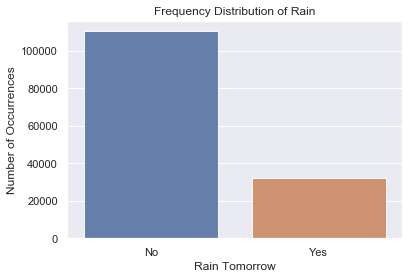

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


In [9]:
class_count1 = rain['RainTomorrow'].value_counts()
sns.set(style="darkgrid")
sns.barplot(class_count1.index, class_count1.values, alpha=0.9)
plt.title('Frequency Distribution of Rain')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Rain Tomorrow', fontsize=12)
plt.show()
print(rain['RainTomorrow'].value_counts())

In [10]:
#missing data
total = rain.isnull().sum().sort_values(ascending=False)
percent = (rain.isnull().sum()/rain.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Sunshine,67816,0.476929
Evaporation,60843,0.427890
Cloud3pm,57094,0.401525
Cloud9am,53657,0.377353
Pressure9am,14014,0.098556
Pressure3pm,13981,0.098324
WindDir9am,10013,0.070418
WindGustDir,9330,0.065615
WindGustSpeed,9270,0.065193
WindDir3pm,3778,0.026570


In [11]:
rain = rain.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am',"RISK_MM"],axis=1)
rain.shape

(142193, 19)

In [12]:
rain = rain.dropna(how='any')
rain.shape

(112925, 19)

In [13]:
from scipy import stats
z = np.abs(stats.zscore(rain._get_numeric_data()))
print(z)
rain= rain[(z < 3).all(axis=1)]
print(rain.shape)

[[0.11756741 0.10822071 0.20666127 ... 1.14245477 0.08843526 0.04787026]
 [0.84180219 0.20684494 0.27640495 ... 1.04184813 0.04122846 0.31776848]
 [0.03761995 0.29277194 0.27640495 ... 0.91249673 0.55672435 0.15688743]
 ...
 [1.44940294 0.23548728 0.27640495 ... 0.58223051 1.03257127 0.34701958]
 [1.16159206 0.46462594 0.27640495 ... 0.25166583 0.78080166 0.58102838]
 [0.77784422 0.4789471  0.27640495 ... 0.2085487  0.37167606 0.56640283]]
(107868, 19)


In [14]:
rain.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000
mean,12.564709,23.653387,1.482925,39.773733,14.692504,19.064199,67.381346,50.343930,1017.754662,1015.345157,17.399578,22.143784
std,6.251908,6.917637,3.904974,11.967334,7.663969,8.017655,18.511889,20.404615,6.733285,6.691289,6.323997,6.766673
min,-6.000000,4.100000,0.000000,7.000000,2.000000,2.000000,11.000000,0.000000,996.400000,994.200000,-1.100000,3.200000
25%,8.000000,18.300000,0.000000,31.000000,9.000000,13.000000,56.000000,36.000000,1013.200000,1010.600000,12.700000,17.000000
50%,12.300000,23.200000,0.000000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.200000,17.000000,21.600000
75%,17.100000,28.700000,0.600000,48.000000,20.000000,24.000000,81.000000,64.000000,1022.300000,1019.900000,22.000000,26.900000
max,31.400000,44.600000,28.000000,80.000000,39.000000,44.000000,100.000000,100.000000,1038.500000,1035.900000,36.500000,42.600000


In [15]:
rain['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
rain['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [16]:
cols=["Pressure9am","Pressure3pm","WindGustSpeed","Humidity3pm","Temp3pm",
      "WindSpeed3pm","Humidity9am","Rainfall","WindSpeed9am","Temp9am","MinTemp","MaxTemp"]
rain2=rain[cols]
rain2.shape

(107868, 12)

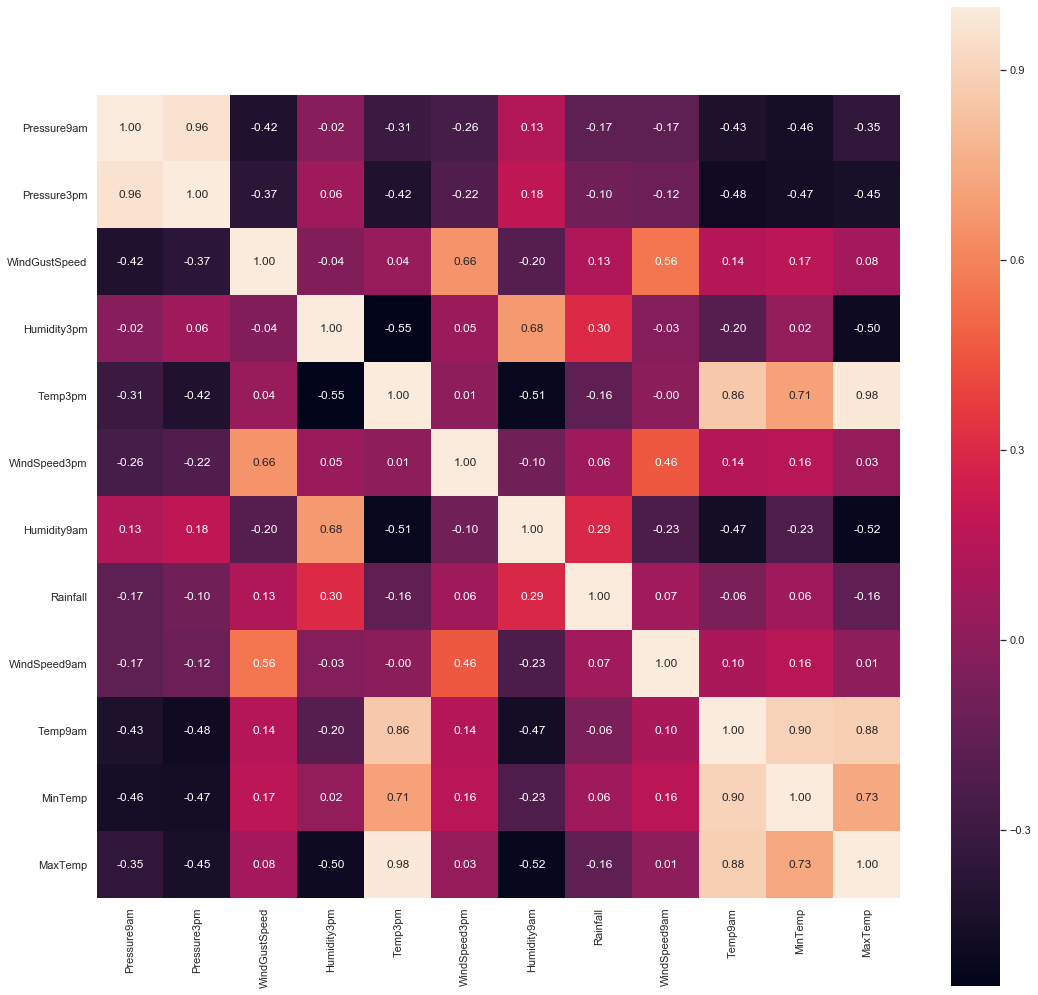

In [17]:
corr=rain2.corr()
plt.figure(figsize = (18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=cols, yticklabels=cols)
plt.show();

In [18]:
# #Checeking for Multicollinearity


def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(rain2, 40))

Top Absolute Correlations
Temp3pm        MaxTemp          0.984985
Pressure9am    Pressure3pm      0.959700
Temp9am        MinTemp          0.901086
               MaxTemp          0.883554
Temp3pm        Temp9am          0.859295
MinTemp        MaxTemp          0.731850
Temp3pm        MinTemp          0.707920
Humidity3pm    Humidity9am      0.675005
WindGustSpeed  WindSpeed3pm     0.660688
               WindSpeed9am     0.556157
Humidity3pm    Temp3pm          0.546416
Humidity9am    MaxTemp          0.517233
Temp3pm        Humidity9am      0.511147
Humidity3pm    MaxTemp          0.496843
Pressure3pm    Temp9am          0.482068
               MinTemp          0.470082
Humidity9am    Temp9am          0.468138
WindSpeed3pm   WindSpeed9am     0.458910
Pressure9am    MinTemp          0.457125
Pressure3pm    MaxTemp          0.447246
Pressure9am    Temp9am          0.430996
Pressure3pm    Temp3pm          0.416783
Pressure9am    WindGustSpeed    0.415008
Pressure3pm    WindGustSpeed   

In [19]:
rain2[rain2.columns[:]].corr()['Rainfall'][:]

Pressure9am     -0.170271
Pressure3pm     -0.103090
WindGustSpeed    0.129801
Humidity3pm      0.302529
Temp3pm         -0.164667
WindSpeed3pm     0.057727
Humidity9am      0.293940
Rainfall         1.000000
WindSpeed9am     0.070536
Temp9am         -0.060406
MinTemp          0.060468
MaxTemp         -0.159865
Name: Rainfall, dtype: float64

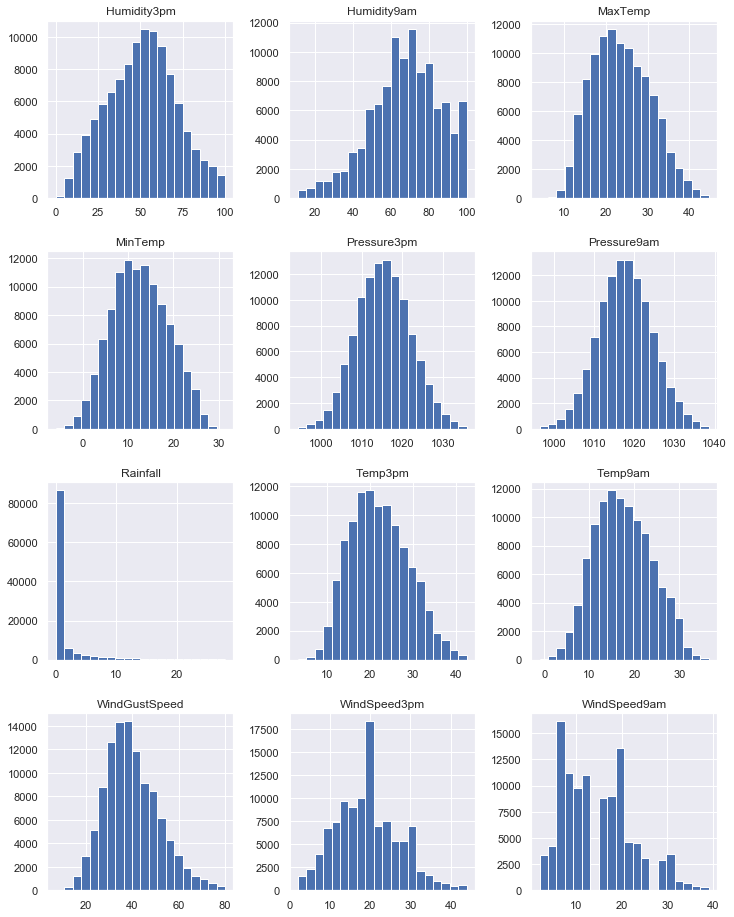

In [20]:
rain2.hist(bins = 20 , figsize= (12,16)) ;

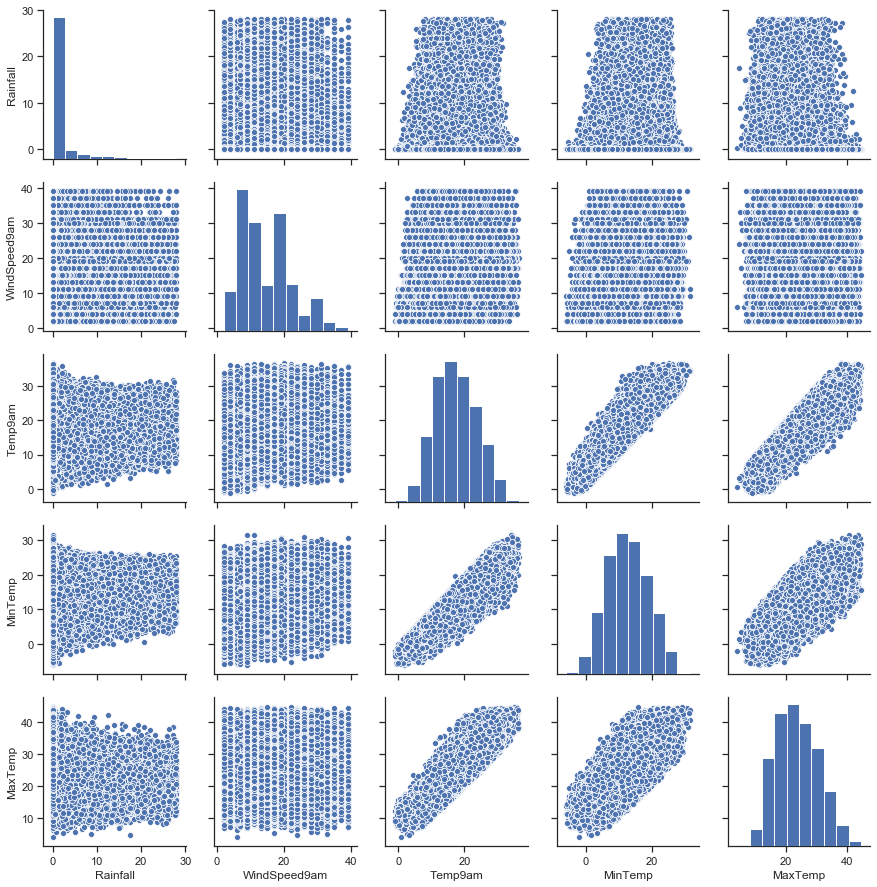

In [21]:
col = ["Rainfall","WindSpeed9am","Temp9am","MinTemp","MaxTemp"]
sns.set(style="ticks", color_codes=True)
sns.pairplot(rain[col])
plt.show();

In [22]:
rain3= rain.set_index('Date')

In [23]:
rain3['month'] = rain3.index.month
rain3['weekday'] = rain3.index.weekday
rain3['week'] = rain3.index.week

In [24]:
rain3['year'] = rain3.index.year

In [25]:
def yearly(x,df=rain3):
    return df.groupby('year')[x].mean()

In [26]:
def daily(x,df=rain3):
    return df.groupby('weekday')[x].mean()
def monthly_daily(x,df=rain3):
    by_day = df.pivot_table(index='weekday', 
                                columns=['month'],
                                values=x,
                                aggfunc='mean')
    return round(by_day, ndigits=2)

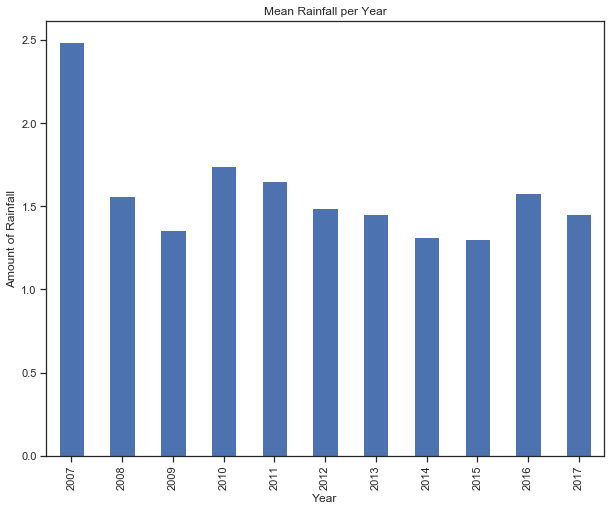

In [27]:
# Plot of Mean Rainfall per Day of Week
yearly('Rainfall').plot(kind = 'bar', figsize=(10,8))
ticks = list(range(0,11, 1)) 
labels = "2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017".split()
plt.xlabel('Year')
plt.ylabel('Amount of Rainfall')
plt.title('Mean Rainfall per Year')
plt.xticks(ticks, labels);

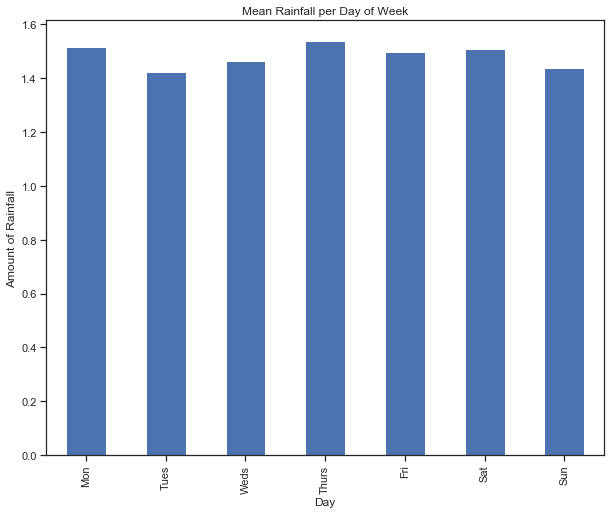

In [28]:
# Plot of Mean Rainfall per Day of Week
daily('Rainfall').plot(kind = 'bar', figsize=(10,8))
ticks = list(range(0, 7, 1)) 
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('Amount of Rainfall')
plt.title('Mean Rainfall per Day of Week')
plt.xticks(ticks, labels);

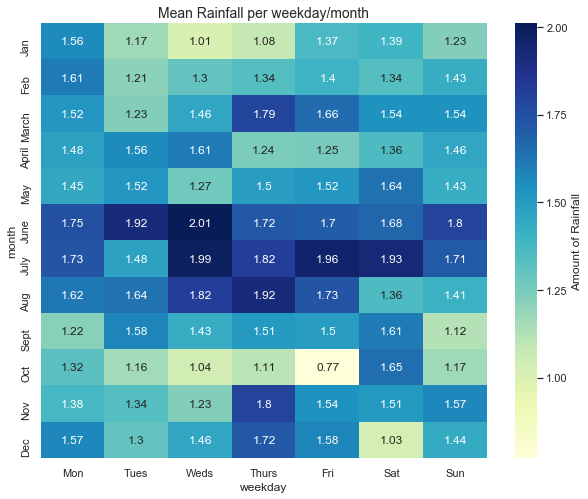

In [29]:
# Heatmap: Mean Rainfall per Weekday of Month
sns.set(rc={'figure.figsize':(10,8)},)
ax=sns.heatmap(monthly_daily('Rainfall').T,cmap="YlGnBu",
               xticklabels="Mon Tues Weds Thurs Fri Sat Sun".split(),
               yticklabels="Jan Feb March April May June July Aug Sept Oct Nov Dec".split(),
               annot=True, fmt='g',
               cbar_kws={'label': 'Amount of Rainfall'}).set_title("Mean Rainfall per weekday/month").set_fontsize('14')

plt.show()

In [30]:
def location(x,df=rain3):
    return df.groupby('Location')[x].mean()


In [31]:
loc_count = rain['Location'].value_counts()

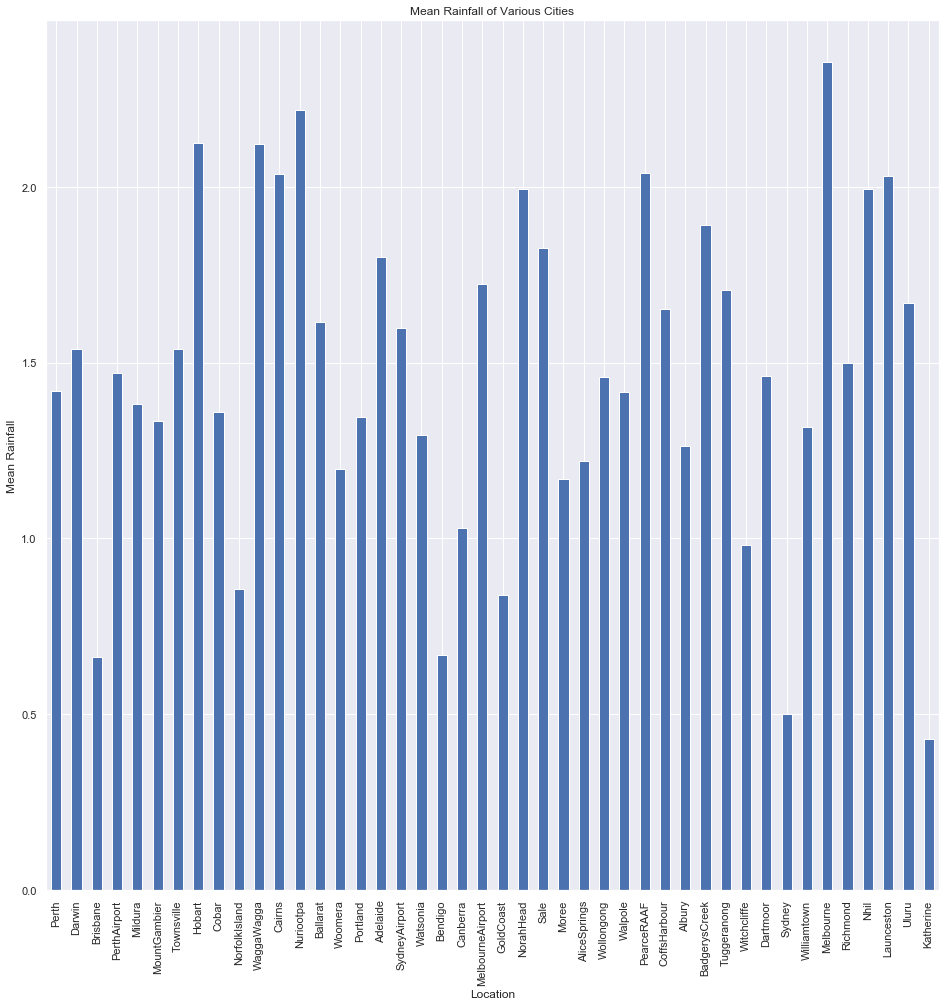

In [32]:
location('Rainfall').plot(kind = 'bar', figsize=(16,16))
ticks = list(range(0, len(rain['Location'].unique().tolist()), 1)) 
plt.xlabel('Location')
plt.ylabel('Mean Rainfall')
plt.title('Mean Rainfall of Various Cities')
plt.xticks(ticks, loc_count.index);

In [33]:
#See unique values and convert them to int using pd.getDummies()
r=rain
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    
    print(np.unique(rain[col]))
# transform the categorical columns
r = pd.get_dummies(rain, columns=categorical_columns)
r.iloc[4:9]

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,2008-12-05,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,0,0
5,2008-12-06,Albury,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,...,0,0,0,0,0,0,0,1,0,0
6,2008-12-07,Albury,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,...,0,0,0,0,0,0,1,0,0,0
7,2008-12-08,Albury,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,...,0,0,0,0,1,0,0,0,0,0
8,2008-12-09,Albury,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,...,0,0,0,1,0,0,0,0,0,0


In [34]:
df=r.drop(columns=['Date','Location'],axis=1)
df.shape
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,1,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,1,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#Scaling
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
df.iloc[4:10]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,0.628342,0.696296,0.035714,0.465753,0.135135,0.428571,0.797753,0.33,0.342043,0.282974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.550802,0.632099,0.007143,0.671233,0.459459,0.523810,0.494382,0.23,0.304038,0.268585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.542781,0.516049,0.000000,0.589041,0.486486,0.523810,0.426966,0.19,0.313539,0.335731,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.366310,0.558025,0.000000,0.383562,0.108108,0.357143,0.415730,0.19,0.403800,0.381295,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.419786,0.686420,0.000000,1.000000,0.135135,0.619048,0.348315,0.09,0.296912,0.225420,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.510695,0.641975,0.050000,0.287671,0.351351,0.214286,0.528090,0.27,0.251781,0.275779,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df=df.sample(n=10000)

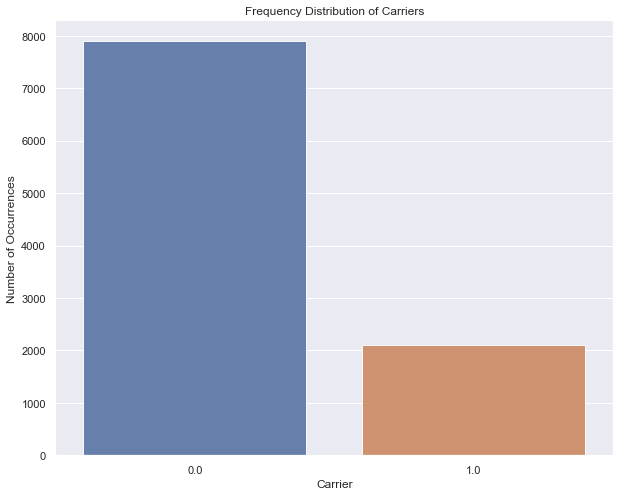

0.0    7897
1.0    2103
Name: RainTomorrow, dtype: int64


In [37]:
class_count = df['RainTomorrow'].value_counts()
sns.set(style="darkgrid")
sns.barplot(class_count.index, class_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()
print(df['RainTomorrow'].value_counts())

In [38]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.498556,0.484471,0.053165,0.447033,0.339143,0.404855,0.632565,0.503764,0.508419,0.508115,...,0.056500,0.057500,0.065200,0.069700,0.071700,0.059400,0.065700,0.057700,0.051900,0.051500
std,0.166079,0.170679,0.140282,0.162874,0.206623,0.192576,0.208458,0.205427,0.160586,0.161768,...,0.230896,0.232807,0.246891,0.254653,0.258003,0.236384,0.247769,0.233187,0.221836,0.221026
min,0.013369,0.019753,0.000000,0.027397,0.000000,0.000000,0.000000,0.010000,0.002375,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.377005,0.353086,0.000000,0.328767,0.189189,0.261905,0.505618,0.350000,0.399050,0.395683,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.494652,0.471605,0.000000,0.438356,0.297297,0.404762,0.640449,0.510000,0.505938,0.505995,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.620321,0.607407,0.021429,0.561644,0.459459,0.523810,0.786517,0.650000,0.617577,0.618705,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.989305,0.995062,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.997625,0.995204,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Training and test split

In [41]:
X = df.loc[:,df.columns!='RainTomorrow']
y = df[['RainTomorrow']]

In [42]:
X_trainS, X_testS, y_trainS, y_testS = train_test_split( 
                        X,y, 
                test_size = 0.25, random_state = 101)

# SVM - Linear kernal

In [43]:
# defining parameter range 
param_grid_l = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid_l = GridSearchCV(SVC(), param_grid=param_grid_l, refit = True, verbose = 2,return_train_score=True) 
  
# fitting the model for grid search 
grid_l.fit(X_trainS, y_trainS)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... C=0.1, gamma=1, kernel=linear, total=   2.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV] .................... C=0.1, gamma=1, kernel=linear, total=   2.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   2.3s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   2.3s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   2.1s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   2.2s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] ................. C=0.1, gamma=0.01, kernel=linear, total=   2.2s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] ................. C=0.1, gamma=0.01, kernel=linear, total=   1.9s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .

[CV] ............... C=100, gamma=0.0001, kernel=linear, total=  17.0s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  6.7min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=2)

In [44]:
# print best parameter after tuning 
print(grid_l.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_l.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [45]:
# Evaluate train set accuracy
train_acc1 = grid_l.score(X_trainS,y_trainS)
print("Train set accuracy of best model: {:.3f}".format(train_acc1))

Train set accuracy of best model: 0.850


In [46]:
grid_predictions_l = grid_l.predict(X_testS) 
print(confusion_matrix(y_testS, grid_predictions_l))
# print classification report 

print("Accuracy:",metrics.accuracy_score(y_testS,grid_predictions_l ))
print(classification_report(y_testS, grid_predictions_l))

[[1880   65]
 [ 320  235]]
Accuracy: 0.846
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91      1945
         1.0       0.78      0.42      0.55       555

    accuracy                           0.85      2500
   macro avg       0.82      0.70      0.73      2500
weighted avg       0.84      0.85      0.83      2500



In [47]:
print("Train Error",1-train_acc1)
print("Test Error",1-metrics.accuracy_score(y_testS,grid_predictions_l ))

Train Error 0.1498666666666667
Test Error 0.15400000000000003


# Gaussian kernal

In [48]:
# defining parameter range 
param_grid_g = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid_g = GridSearchCV(SVC(), param_grid=param_grid_g, refit = True, verbose = 2) 
  
# fitting the model for grid search 
grid_g.fit(X_trainS, y_trainS)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   5.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   5.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   5.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   3.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   3.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   3.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   2.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   3.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   3.0s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  3.7min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [49]:
# print best parameter after tuning 
print(grid_g.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_g.best_estimator_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [50]:
# Evaluate train set accuracy
train_acc2 = grid_g.score(X_trainS,y_trainS)
print("Train set accuracy of best model: {:.3f}".format(train_acc2))

Train set accuracy of best model: 0.867


In [52]:
grid_predictions_g = grid_g.predict(X_testS) 
print(confusion_matrix(y_testS, grid_predictions_g))
# print classification report 
print("Accuracy:",metrics.accuracy_score(y_testS,grid_predictions_g ))
print(classification_report(y_testS, grid_predictions_g))

[[1876   69]
 [ 317  238]]
Accuracy: 0.8456
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      1945
         1.0       0.78      0.43      0.55       555

    accuracy                           0.85      2500
   macro avg       0.82      0.70      0.73      2500
weighted avg       0.84      0.85      0.83      2500



In [53]:
print("Train Error",1-train_acc2)
print("Test Error",1-metrics.accuracy_score(y_testS,grid_predictions_g ))

Train Error 0.13346666666666662
Test Error 0.15439999999999998


# Polynomial kernal

In [54]:
# defining parameter range 
param_grid_s = {'C': [0.1, 1, 10], 'degree':[3,5], 
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['poly']}  
  
grid_s = GridSearchCV(SVC(), param_grid=param_grid_s, refit = True, verbose = 2) 
  
# fitting the model for grid search 
grid_s.fit(X_trainS, y_trainS)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] C=0.1, degree=3, gamma=1, kernel=poly ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ C=0.1, degree=3, gamma=1, kernel=poly, total=   3.9s
[CV] C=0.1, degree=3, gamma=1, kernel=poly ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV] ............ C=0.1, degree=3, gamma=1, kernel=poly, total=   3.5s
[CV] C=0.1, degree=3, gamma=1, kernel=poly ...........................
[CV] ............ C=0.1, degree=3, gamma=1, kernel=poly, total=   3.9s
[CV] C=0.1, degree=3, gamma=0.1, kernel=poly .........................
[CV] .......... C=0.1, degree=3, gamma=0.1, kernel=poly, total=   2.9s
[CV] C=0.1, degree=3, gamma=0.1, kernel=poly .........................
[CV] .......... C=0.1, degree=3, gamma=0.1, kernel=poly, total=   2.5s
[CV] C=0.1, degree=3, gamma=0.1, kernel=poly .........................
[CV] .......... C=0.1, degree=3, gamma=0.1, kernel=poly, total=   2.6s
[CV] C=0.1, degree=3, gamma=0.01, kernel=poly ........................
[CV] ......... C=0.1, degree=3, gamma=0.01, kernel=poly, total=   2.2s
[CV] C=0.1, degree=3, gamma=0.01, kernel=poly ........................
[CV] ......... C=0.1, degree=3, gamma=0.01, kernel=poly, total=   2.1s
[CV] C=0.1, degree=3, gamma=0.01, kernel=poly ........................
[CV] .

[CV] ......... C=10, degree=3, gamma=0.001, kernel=poly, total=   2.6s
[CV] C=10, degree=5, gamma=1, kernel=poly ............................
[CV] ............. C=10, degree=5, gamma=1, kernel=poly, total=   4.3s
[CV] C=10, degree=5, gamma=1, kernel=poly ............................
[CV] ............. C=10, degree=5, gamma=1, kernel=poly, total=   4.5s
[CV] C=10, degree=5, gamma=1, kernel=poly ............................
[CV] ............. C=10, degree=5, gamma=1, kernel=poly, total=   5.0s
[CV] C=10, degree=5, gamma=0.1, kernel=poly ..........................
[CV] ........... C=10, degree=5, gamma=0.1, kernel=poly, total=   3.2s
[CV] C=10, degree=5, gamma=0.1, kernel=poly ..........................
[CV] ........... C=10, degree=5, gamma=0.1, kernel=poly, total=   3.3s
[CV] C=10, degree=5, gamma=0.1, kernel=poly ..........................
[CV] ........... C=10, degree=5, gamma=0.1, kernel=poly, total=   3.4s
[CV] C=10, degree=5, gamma=0.01, kernel=poly .........................
[CV] .

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  3.6min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'degree': [3, 5],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [55]:
# print best parameter after tuning 
print(grid_s.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_s.best_estimator_)

{'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [56]:
# Evaluate train set accuracy
train_acc3 = grid_s.score(X_trainS,y_trainS)
print("Train set accuracy of best model: {:.3f}".format(train_acc3))

Train set accuracy of best model: 0.888


In [57]:
grid_predictions_s = grid_s.predict(X_testS) 

# print classification report 
print(confusion_matrix(y_testS, grid_predictions_s))
print("Accuracy:",metrics.accuracy_score(y_testS,grid_predictions_s ))
print(classification_report(y_testS, grid_predictions_s))

[[1869   76]
 [ 313  242]]
Accuracy: 0.8444
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      1945
         1.0       0.76      0.44      0.55       555

    accuracy                           0.84      2500
   macro avg       0.81      0.70      0.73      2500
weighted avg       0.84      0.84      0.83      2500



In [58]:
print("Train Error",1-train_acc3)
print("Test Error",1-metrics.accuracy_score(y_testS,grid_predictions_s ))

Train Error 0.11199999999999999
Test Error 0.15559999999999996


# Descision tree

In [59]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf1 = clf1.fit(X_trainS,y_trainS)

In [60]:
# Evaluate train set accuracy
train_acc4 = clf1.score(X_trainS,y_trainS)
print("Train set accuracy of best model: {:.3f}".format(train_acc4))

Train set accuracy of best model: 1.000


In [61]:
#Predict the response for test dataset
y_pred_nt = clf1.predict(X_testS)
# print classification report 
print(confusion_matrix(y_testS, y_pred_nt))
print("Accuracy:",metrics.accuracy_score(y_testS,y_pred_nt ))
print(classification_report(y_testS, y_pred_nt))

[[1679  266]
 [ 271  284]]
Accuracy: 0.7852
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      1945
         1.0       0.52      0.51      0.51       555

    accuracy                           0.79      2500
   macro avg       0.69      0.69      0.69      2500
weighted avg       0.78      0.79      0.78      2500



In [62]:
print("Train Error",1-train_acc4)
print("Test Error",1-metrics.accuracy_score(y_testS,y_pred_nt ))

Train Error 0.0
Test Error 0.2148


In [63]:
feature_cols=list(X)

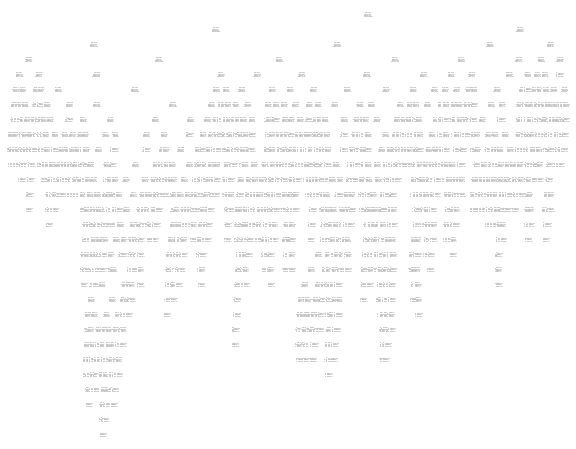

In [107]:
#dot_data = StringIO()

#export_graphviz(clf1, out_file=dot_data,  
#               filled=True, rounded=True,
#              special_characters=True,feature_names = feature_cols,class_names=['0','1'])

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('RainTomorrow 1.png')
#Image(graph.create_png())
clf1 = tree.DecisionTreeClassifier(random_state=0)
clf1 = clf1.fit(X_trainS,y_trainS)
plt.show(tree.plot_tree(clf1))

# Pruned tree using hyperparameter tuning

In [65]:
param_grid_dt= {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20]
              }

dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(dt, param_grid=param_grid_dt, refit = True, verbose = 2) 

In [66]:
grid_dt.fit(X_trainS, y_trainS)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, total=   0.2s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, total=   0.2s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, total=   0.2s
[CV] criterion=gini, max_dep

[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20, total=   0.1s
[CV] criterion=gini, max_depth=None, max_lea

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, mi

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, mi

[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split

[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, total=   0.1s
[CV] criterion=entropy, max_dep

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] criteri

[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, m

[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_sa

[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] criterion=entr

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_le

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_le

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_le

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, total=   0.1s
[CV] criterion=entropy, max_depth=

[Parallel(n_jobs=1)]: Done 864 out of 864 | elapsed:   55.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10],
                

In [67]:
# print best parameter after tuning 
print(grid_dt.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_dt.best_estimator_)

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [68]:
clf2=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
clf2 = clf2.fit(X_trainS,y_trainS)

In [69]:
# Evaluate train set accuracy
train_acc5 = clf2.score(X_trainS,y_trainS)
print("Test set accuracy of best model: {:.3f}".format(train_acc5))

Test set accuracy of best model: 0.835


In [70]:
grid_predictions_dt = clf2.predict(X_testS) 

# print classification report 
print(confusion_matrix(y_testS, grid_predictions_dt))
print("Accuracy:",metrics.accuracy_score(y_testS,grid_predictions_dt ))
print(classification_report(y_testS, grid_predictions_dt))

[[1916   29]
 [ 406  149]]
Accuracy: 0.826
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90      1945
         1.0       0.84      0.27      0.41       555

    accuracy                           0.83      2500
   macro avg       0.83      0.63      0.65      2500
weighted avg       0.83      0.83      0.79      2500



In [71]:
print("Train Error",1-train_acc5)
print("Test Error",1-metrics.accuracy_score(y_testS,grid_predictions_dt ))

Train Error 0.1652
Test Error 0.17400000000000004


In [72]:
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('RainTomorrow.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

# XG Boost

In [73]:
estimator = XGBClassifier(
    objective= 'binary:logistic', 
    nthread=4,
    seed=42)

In [74]:
# fit model no training data

xg1=estimator.fit(X_trainS, y_trainS)
train_acc6 = xg1.score(X_trainS,y_trainS)
print("Train set accuracy of best model: {:.3f}".format(train_acc6))

Train set accuracy of best model: 0.867


In [75]:
#Predict the response for test dataset
y_pred_xg1 = xg1.predict(X_testS)
# print classification report 
print(confusion_matrix(y_testS, y_pred_xg1))
print("Accuracy:",metrics.accuracy_score(y_testS,y_pred_xg1 ))
print(classification_report(y_testS, y_pred_xg1))

[[1858   87]
 [ 293  262]]
Accuracy: 0.848
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      1945
         1.0       0.75      0.47      0.58       555

    accuracy                           0.85      2500
   macro avg       0.81      0.71      0.74      2500
weighted avg       0.84      0.85      0.83      2500



In [76]:
print("Train Error",1-train_acc6)
print("Test Error",1-metrics.accuracy_score(y_testS,y_pred_xg1 ))

Train Error 0.1333333333333333
Test Error 0.15200000000000002


# Hyperparameter tuning using randomized search

In [77]:
parameters = {
    'max_depth': [2,3,5,10],
    'n_estimators': [100,500,1000],
    'learning_rate': [0.01,0.005,0.001],
    'min_child_weight': [1,5],
    'eta':[.3],
    'gamma': [0,1,5]
}

In [78]:
grid_xgb = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=parameters,
    scoring = 'roc_auc',
    verbose=True
)

In [79]:
grid_xgb.fit(X_trainS, y_trainS)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.4min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=4,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha...
                                           seed=42, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distrib

In [80]:
# print best parameter after tuning 
print(grid_xgb.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_xgb.best_estimator_)

{'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 5, 'eta': 0.3}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=5,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)


In [81]:
xgb1=XGBClassifier(booster='gbtree', gamma=5,n_estimators=1000)
xgb1=xgb1.fit(X_trainS,y_trainS)

In [82]:
# Evaluate train set accuracy
train_acc7 = grid_xgb.score(X_trainS,y_trainS)
print("Train set accuracy of best model: {:.3f}".format(train_acc7))


Train set accuracy of best model: 0.913


In [83]:
#Predict the response for test dataset
y_pred_xg2 = grid_xgb.predict(X_testS)
# print classification report 
print(confusion_matrix(y_testS, y_pred_xg2))
print("Accuracy:",metrics.accuracy_score(y_testS,y_pred_xg2))
print(classification_report(y_testS, y_pred_xg2))

[[1866   79]
 [ 296  259]]
Accuracy: 0.85
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      1945
         1.0       0.77      0.47      0.58       555

    accuracy                           0.85      2500
   macro avg       0.81      0.71      0.74      2500
weighted avg       0.84      0.85      0.84      2500



In [84]:
print("Train Error",1-train_acc7)
print("Test Error",1-metrics.accuracy_score(y_testS,y_pred_xg2 ))

Train Error 0.08662061348670502
Test Error 0.15000000000000002


# Learning curves

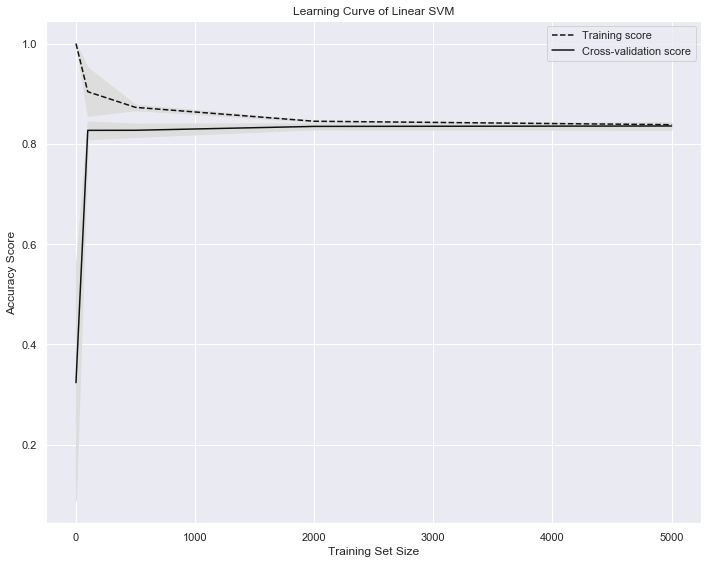

In [87]:
from sklearn.model_selection import learning_curve
train_sizes = [1, 100, 500, 2000, 5000]
train_sizes, train_scores, validation_scores = learning_curve(clf2,
X = X_trainS,
y = y_trainS, train_sizes = train_sizes, cv = 5,
scoring = 'accuracy')
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(validation_scores, axis=1)
test_std = np.std(validation_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Linear SVM")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

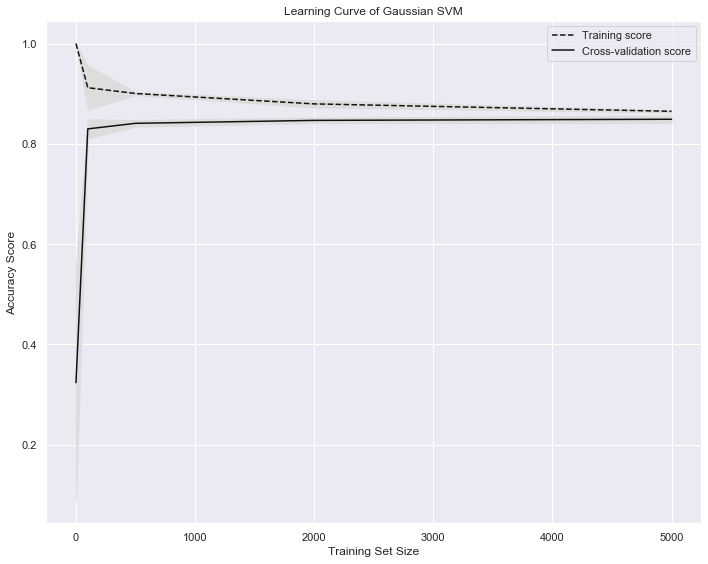

In [88]:
train_sizes = [1, 100, 500, 2000, 5000]
train_sizes, train_scores, validation_scores = learning_curve(xgb1,
X = X_trainS,
y = y_trainS, train_sizes = train_sizes, cv = 5,
scoring = 'accuracy')
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(validation_scores, axis=1)
test_std = np.std(validation_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Gaussian SVM")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

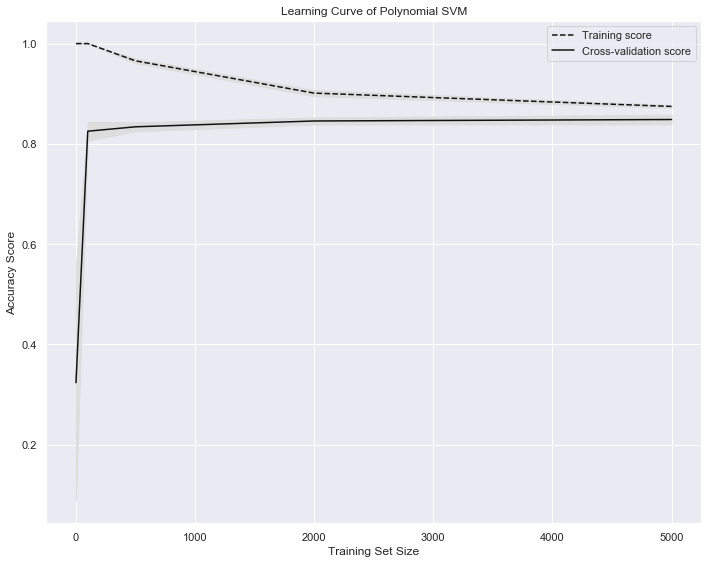

In [89]:
train_sizes = [1, 100, 500, 2000, 5000]
train_sizes, train_scores, validation_scores = learning_curve(xg1,
X = X_trainS,
y = y_trainS, train_sizes = train_sizes, cv = 5,
scoring = 'accuracy')
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(validation_scores, axis=1)
test_std = np.std(validation_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Polynomial SVM")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

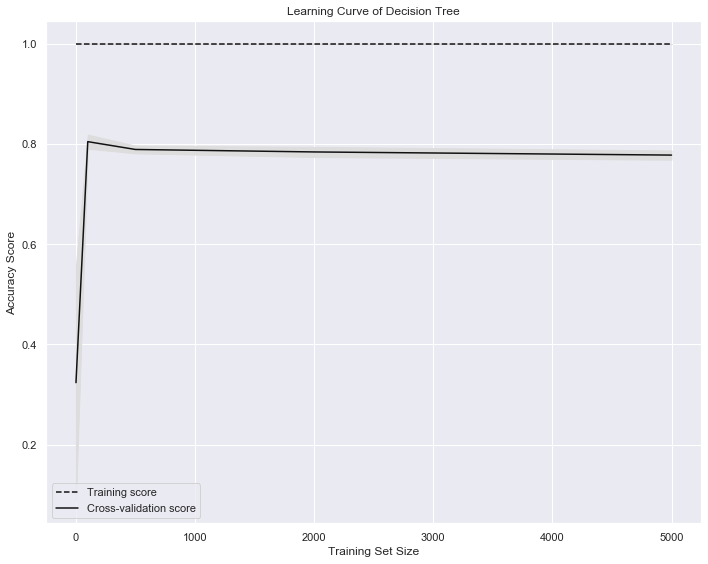

In [90]:
train_sizes = [1, 100, 500, 2000, 5000]
train_sizes, train_scores, validation_scores = learning_curve(clf1,
X = X_trainS,
y = y_trainS, train_sizes = train_sizes, cv = 5,
scoring = 'accuracy')
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(validation_scores, axis=1)
test_std = np.std(validation_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Decision Tree")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

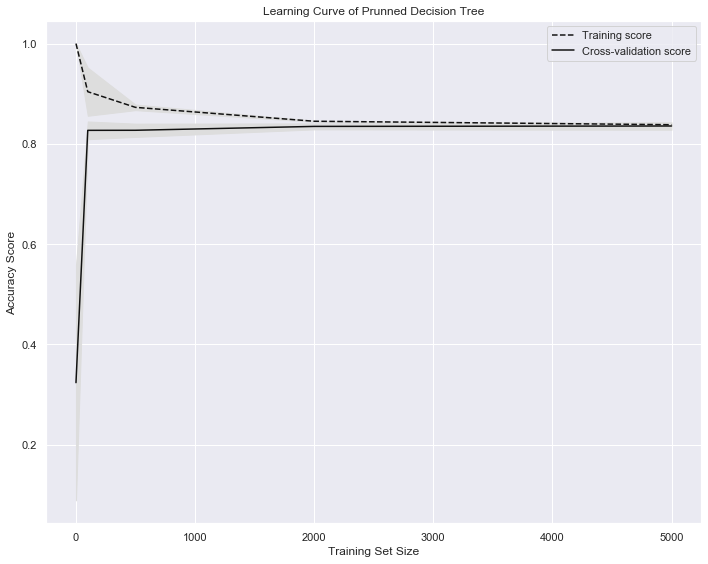

In [91]:
train_sizes = [1, 100, 500, 2000, 5000]
train_sizes, train_scores, validation_scores = learning_curve(clf2,
X = X_trainS,
y = y_trainS, train_sizes = train_sizes, cv = 5,
scoring = 'accuracy')
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(validation_scores, axis=1)
test_std = np.std(validation_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Prunned Decision Tree")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

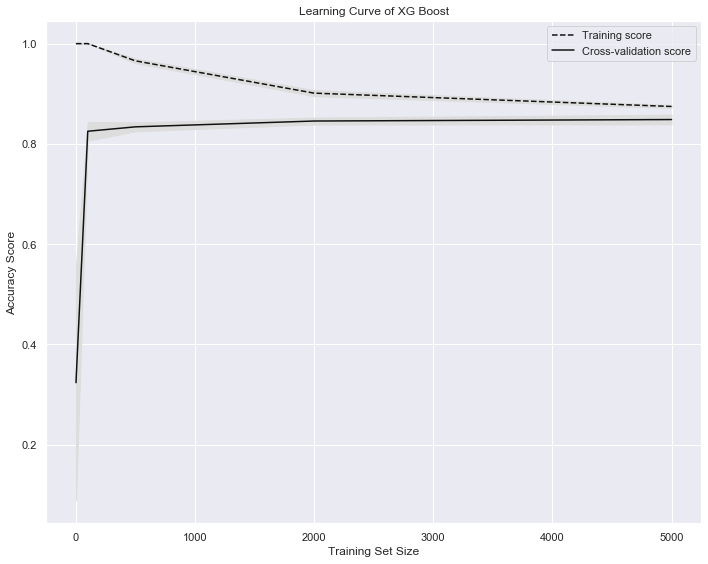

In [92]:
train_sizes = [1, 100, 500, 2000, 5000]
train_sizes, train_scores, validation_scores = learning_curve(xg1,
X = X_trainS,
y = y_trainS, train_sizes = train_sizes, cv = 5,
scoring = 'accuracy')
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(validation_scores, axis=1)
test_std = np.std(validation_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of XG Boost")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

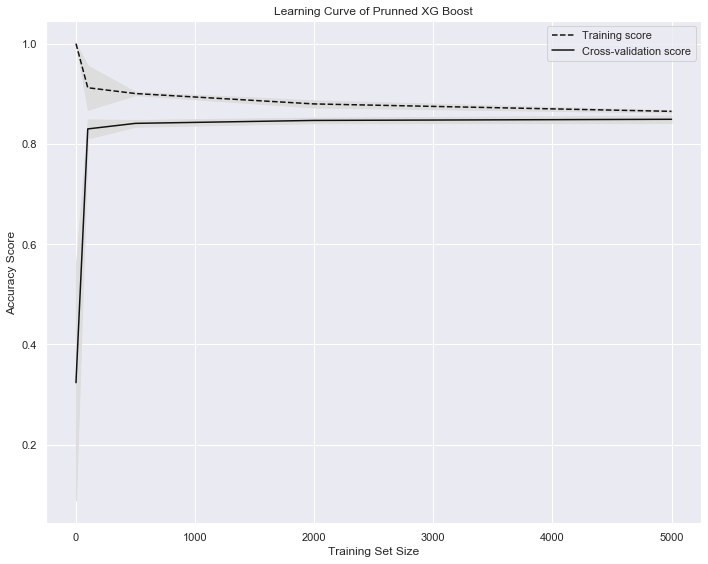

In [93]:
train_sizes = [1, 100, 500, 2000, 5000]
train_sizes, train_scores, validation_scores = learning_curve(xgb1,
X = X_trainS,
y = y_trainS, train_sizes = train_sizes, cv = 5,
scoring = 'accuracy')
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(validation_scores, axis=1)
test_std = np.std(validation_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Prunned XG Boost")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()